# Chapter 2 A short tour of the Predictive Modeling Process


As stated in the previous chapter, the csv version of the original data set can be downloaded from this repository.

This chapter explores and demonstrates the concepts of data spending, building candidate models, and selecting the optimal model.

## Case Study: Predicting Fuel Economy

Motor vehicles contain many different variables that can help us predict the Fuel Economy. In this simple example however, we only use a single predictor: the Engine Displacement (volume inside the engine cylinders). The response is unadjusted highway MPG (miles per gallon) for the year 2010-2011 model cars

Since there is only one predictor, understanding of the data can be done via graphing.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
path="./data/FuelEconomy"
cars2010=pd.read_csv(path+"/cars2010.csv", sep=',')
cars2011=pd.read_csv(path+"/cars2011.csv", sep=',')

Text(0.5, 0.02, 'Engine Displacement')

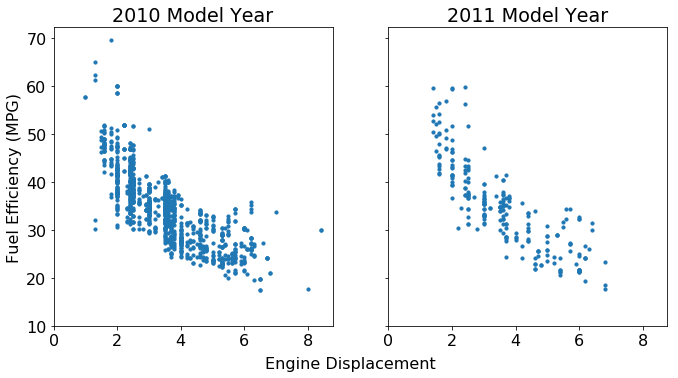

In [42]:
plt.rcParams["font.size"] = 16

fig,ax=plt.subplots(1,2, figsize=[11,5.5], sharey=True, sharex=True)
ax[0].scatter(cars2010['EngDispl'], cars2010['FE'], s=10)
ax[1].scatter(cars2011['EngDispl'], cars2011['FE'], s=10)
ax[0].set_title("2010 Model Year")
ax[1].set_title("2011 Model Year")
ax[0].set_ylabel("Fuel Efficiency (MPG)")

ax[0].set_xlim(left=0)
ax[1].set_ylim(bottom=10)

fig.text(0.5,0.02, "Engine Displacement", horizontalalignment='center')

If more than one predictor, understanding the characteristics of the predictors and the relationships among the predictors help us in making crucial decisions during the pre-processing steps prior to building a model.

After first understanding the data, the next step is to build and evaluate a model on the data. Here we will use the 2010 data as the __training set__ and then use t he 2011 data as the __validation or test set__. Here we will use Linear regression, which is a fancy way of saying __fitting a straight line__

Text(0.5, 0, 'Observed')

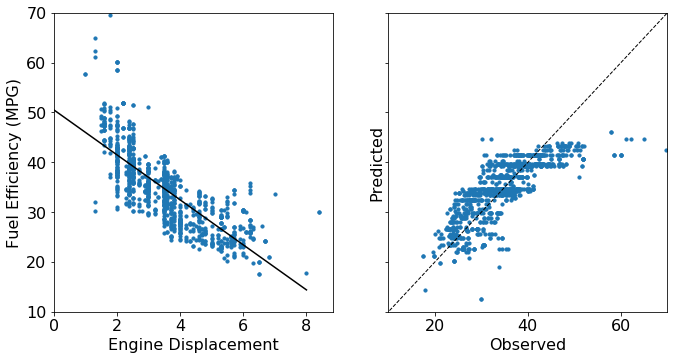

In [84]:
import numpy as np
p1,p0=np.polyfit(cars2010['EngDispl'], cars2010['FE'],1)
x=np.arange(0,9)
def fit(x):
    return p0+p1*x

fig,ax=plt.subplots(1,2, figsize=[11,5.5], sharey=True,)

# plots
ax[0].scatter(cars2010['EngDispl'], cars2010['FE'], s=10)
ax[0].plot(x, fit(x), color='black')
ax[1].scatter(cars2010['FE'], fit(cars2010['EngDispl']), s=10)
ax[1].plot([0,70],[0,70],linestyle='--',linewidth=1, color='black')
# configure
ax[0].set_xlim(left=0)
ax[1].set_xlim(left=10, right=70)
ax[0].set_ylim(bottom=10, top=70)
ax[0].set_xlabel("Engine Displacement")
ax[0].set_ylabel("Fuel Efficiency (MPG)")

ax[1].set_ylabel("Predicted")
ax[1].set_xlabel("Observed")

In [85]:
p0

50.5632299116973

In [86]:
p1

-4.52092927917399

The slope of the line is determined to be -4.52 while the intercept is 50.56 . Model shown above is plotted along with the original on the left. On the right, it shows how predicted FE values compare against the observed (original). In the left, the model seems to miss the trends below 2L and after 6L. The measure of a fit can be quantified by Root Mean square error

In [87]:
RMSE=np.sqrt(np.sum((cars2010['FE']-fit(cars2010['EngDispl']))**2)/len(cars2010['FE']))
RMSE

4.620076226095307

By looking at the model, it appears some high order polynomial can be used to capture what the linear model could not

Text(0.5, 0, 'Observed')

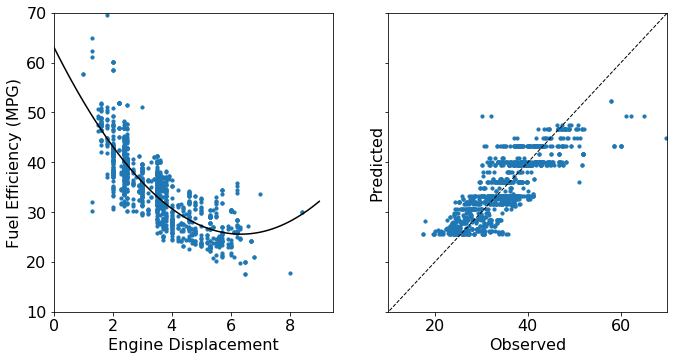

In [88]:
import numpy as np
p2,p1,p0=np.polyfit(cars2010['EngDispl'], cars2010['FE'],2)
x=np.linspace(0,9,100)
def fit(x):
    return p0+p1*x+p2*x**2

fig,ax=plt.subplots(1,2, figsize=[11,5.5], sharey=True,)

# plots
ax[0].scatter(cars2010['EngDispl'], cars2010['FE'], s=10)
ax[0].plot(x, fit(x), color='black')
ax[1].scatter(cars2010['FE'], fit(cars2010['EngDispl']), s=10)
ax[1].plot([0,70],[0,70],linestyle='--',linewidth=1, color='black')
# configure
ax[0].set_xlim(left=0)
ax[1].set_xlim(left=10, right=70)
ax[0].set_ylim(bottom=10, top=70)
ax[0].set_xlabel("Engine Displacement")
ax[0].set_ylabel("Fuel Efficiency (MPG)")

ax[1].set_ylabel("Predicted")
ax[1].set_xlabel("Observed")

In [89]:
RMSE=np.sqrt(np.sum((cars2010['FE']-fit(cars2010['EngDispl']))**2)/len(cars2010['FE']))
RMSE

4.234825856080061

It provides better RMSE than the linear method. However the problem with polynomial fits is that they are prone to overfit.

Alternatively, we can apply multivariate adaptive regression spline (MARS) model